### **Crear carpetas**

In [ ]:
!mkdir models
!mkdir static
!mkdir templates

In [23]:
!mkdir static/css 
!mkdir static/js

mkdir: cannot create directory ‘static/css’: File exists
mkdir: cannot create directory ‘static/js’: File exists


### ***Pruebas de modelo sin servicio web y sin base de datos***

Modelo cargado exitosamente
Predicción
Predicción: marchita_hace_mucho


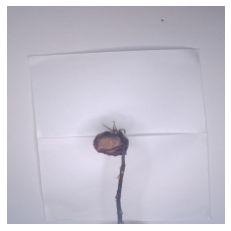

In [28]:
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

width_shape = 224
height_shape = 224

names = ['aceptable','marchita_dia_1-4','marchita_hace_mucho']

path = 'models/model_Rosas.h5'
modelo = tf.keras.models.load_model((path),custom_objects={'KerasLayer':hub.KerasLayer})
print("Modelo cargado exitosamente")

imaget_path = "ImagenPrueba_6.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)

xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)

print("Predicción")
preds = modelo.predict(xt)

print("Predicción:", names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### ***Descarga e instalación de ngrok***

In [1]:
!pip install flask-ngrok

In [5]:
!pip install pyngrok --quiet

In [6]:
from pyngrok import ngrok

In [7]:
from flask_ngrok import run_with_ngrok
!ngrok authtoken 25PC5a0BW7mU4bCLAFB3snSxKE7_4xG5EnEhmNoVHhMQ9K5WW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [8]:
ngrok.kill()

In [9]:
NGROK_AUTH_TOKEN = "25PC5a0BW7mU4bCLAFB3snSxKE7_4xG5EnEhmNoVHhMQ9K5WW"

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

### ***Pruebas de modelo con servicio web y con base de datos***

In [39]:
from werkzeug.utils import secure_filename
import flask
import flask
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import os
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import psycopg2

width_shape = 224
height_shape = 224

#names = ['aceptable','marchita_dia_1-4','marchita_hace_mucho']
names = ['0','1','2']

app = Flask(__name__)
run_with_ngrok(app)

path = 'models/model_Rosas.h5'
modelo = tf.keras.models.load_model((path),custom_objects={'KerasLayer':hub.KerasLayer})
print("Modelo cargado exitosamente")

def model_predict(img_path, model):
    img=cv2.resize(cv2.imread(img_path), 
                   (width_shape, height_shape),
                   interpolation = cv2.INTER_AREA)
    x=np.asarray(img)
    x=preprocess_input(x)
    x = np.expand_dims(x,axis=0)
    
    preds = model.predict(x)
    return preds

@app.route('/', methods=['GET', 'POST'])
def index():
    return render_template('index.php')

@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        f = request.files['file']

        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        preds = model_predict(file_path, model)

        print('PREDICCIÓN', names[np.argmax(preds)])

        result = str(names[np.argmax(preds)])              
        return result
    return None

app.run()



Modelo cargado exitosamente
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6b2f-34-75-157-152.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Feb/2022 09:27:59] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Feb/2022 09:27:59] "GET /static/css/main.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Feb/2022 09:28:41] "GET /js/scripts.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Feb/2022 09:28:41] "GET /js/scripts.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Feb/2022 09:28:42] "GET /static/js/main.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Feb/2022 09:28:54] "POST / HTTP/1.1" 200 -


### ***Pruebas de modelo con base de datos y sin servicio web***

In [31]:
from werkzeug.utils import secure_filename
import os
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import psycopg2

width_shape = 224
height_shape = 224

#names = ['aceptable','marchita_dia_1-4','marchita_hace_mucho']
names = ['0','1','2']

path = 'models/model_Rosas.h5'
modelo = tf.keras.models.load_model((path),custom_objects={'KerasLayer':hub.KerasLayer})
print("Modelo cargado exitosamente")

def model_predict(img_path, model):
    img=cv2.resize(cv2.imread(img_path),(width_shape, height_shape),interpolation = cv2.INTER_AREA)
    x=np.asarray(img)
    x=preprocess_input(x)
    x = np.expand_dims(x,axis=0)
    
    preds = model.predict(x)
    return preds

Modelo cargado exitosamente


In [36]:
try:
  connection=psycopg2.connect(
      host='rosie.db.elephantsql.com',
      user='tnvfomkj',
      password='y22QIO3M0vRcv0ydEvak3JTIY-MhrmyL',
      database='tnvfomkj'
  )
  print("Conexión exitosa")
  cursor=connection.cursor()
  cursor.execute("SELECT * FROM imagen")
  rows=cursor.fetchone()
  for row in rows:
    print(row)
except Exception as ex:
    print(ex)

Conexión exitosa
https://i.ibb.co/VCcTRp1/Imagen-Prueba-1.jpg                                                                                    


In [37]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [38]:
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = row
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")


0
aceptable


### ***Pruebas***

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 08:53:52 2020

@author: dreve
"""

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

import numpy as np
import cv2
import matplotlib.pyplot as plt


width_shape = 224
height_shape = 224


names = ['aceptable','marchita_dia_1-4','marchita_hace_mucho']


modelt = load_model("models/model_Rosas.h5")
print("Modelo cargado exitosamente")

imaget_path = "ImagenPrueba_1.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)

xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)

print("Predicción")
preds = modelt.predict(xt)

print("Predicción:", names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()